In [40]:
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import os
import graphviz
from sklearn import tree
%matplotlib inline

In [3]:
iris_dataset = datasets.load_iris()

In [5]:
# data : 머신러닝할 데이터(x)
# target : data에 따른 정답값(y)
# target_names: target의 이름
# DESCR : 설명
# feature_names: data의 컬럼의 이름
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# 데이터의 갯수 보기
len(iris_dataset.data)

150

In [7]:
# 데이터의 컬럼명
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
# 데이터 설명
# iris_dataset['DESCR']

In [11]:
# 예측 데이터를 학습용과 테스트용으로 나누기
# - 학습용: 75%
# - 테스트용 : 25%
x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target)

In [15]:
iris_df = pd.DataFrame(x_train, columns=iris_dataset.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.6,2.7,4.2,1.3
1,7.7,2.6,6.9,2.3
2,6.2,2.8,4.8,1.8
3,7.9,3.8,6.4,2.0
4,5.0,2.3,3.3,1.0


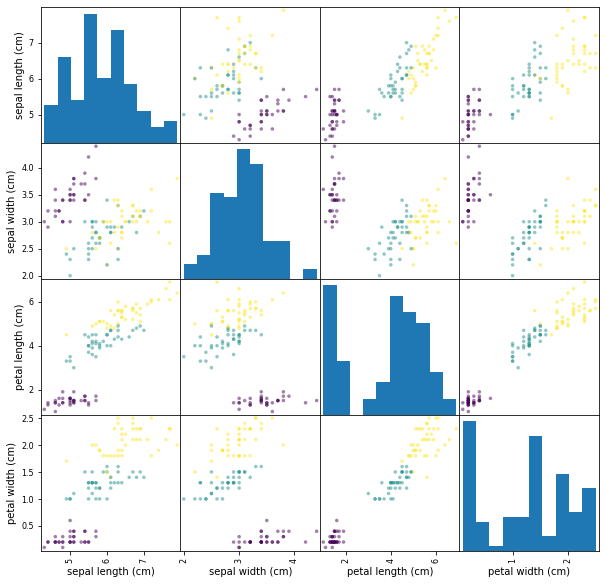

In [26]:
# 시각화
pd.plotting.scatter_matrix(iris_df
                          , c=y_train # 색으로 구분할 값
                           , figsize=(10,10) # 크기
                           , s = 50
                          )
pass

# 머신러닝을 통하여 예측하기
- K-최근접 이웃 알고리즘(분류기)
- K는 가장 가까운 이웃을 뜻한다.

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
prediction = knn.predict(x_test)

In [35]:
np.mean(y_test==prediction)

0.9473684210526315

In [34]:
accuracy_score(prediction, y_test)

0.9473684210526315

In [37]:
# 모델 시각화 하기
!pip install graphviz

In [39]:
os.environ['PATH'] += os.pathsep + 'C:/bigdata_kpk_1400/resource/source/release/bin'

In [42]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
np.mean(y_test == clf.predict(x_test))

0.9210526315789473

# graphviz를 이용하여 모델을 시각화하기

In [46]:
dot_data = tree.export_graphviz(clf
                    , out_file=None
                    , feature_names=iris_dataset.feature_names
                    , class_names=iris_dataset.target_names
                    , filled=True)

In [48]:
graph = graphviz.Source(dot_data)
graph.render('iris')

'iris.pdf'

In [51]:
iris_dataset.feature_names[0:5]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
iris_dataset.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [50]:
iris_dataset.target[0:5]

array([0, 0, 0, 0, 0])